In [37]:
%%bash
wget http://data.openoakland.org/sites/default/files/OakAssessorsRollWParcelCentroidsJune2013_0.csv \
     -O LandValues.csv
     
wget http://data.openoakland.org/sites/default/files/Oakland_Parcels2014.zip \
     -O ParcelData.zip
     
unzip ParcelData.zip

Archive:  ParcelData.zip
  inflating: Oakland_Parcels2014.csv  


--2017-01-21 20:30:43--  http://data.openoakland.org/sites/default/files/OakAssessorsRollWParcelCentroidsJune2013_0.csv
Resolving data.openoakland.org (data.openoakland.org)... 23.253.170.198, 192.237.244.135, 104.130.220.167, ...
Connecting to data.openoakland.org (data.openoakland.org)|23.253.170.198|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44337289 (42M) [text/csv]
Saving to: 'LandValues.csv'

     0K .......... .......... .......... .......... ..........  0%  803K 54s
    50K .......... .......... .......... .......... ..........  0% 1.85M 38s
   100K .......... .......... .......... .......... ..........  0% 4.25M 29s
   150K .......... .......... .......... .......... ..........  0% 10.9M 23s
   200K .......... .......... .......... .......... ..........  0% 2.33M 22s
   250K .......... .......... .......... .......... ..........  0% 4.92M 19s
   300K .......... .......... .......... .......... ..........  0% 7.49M 17s
   350K .......... ..........

In [205]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import re

In [243]:
df = pd.read_csv('./LandValues.csv')
relavant = df.filter(items=['CenterLat', 'CenterLong', 'LandVal', 'ImprVal',
                            'NtTotVal', 'ResidUnits', 'TractUnits', 'SIZE',
                            'Address', 'APNprint'])
filted = relavant.query("not ((LandVal == 0) | (ImprVal == 0) | (NtTotVal == 0))").dropna()[::2]
df = filted

cost_df = pd.read_csv('./Oakland_Parcels2014.csv')
cost_df.dropna()
cost_df = cost_df.filter(items=['Address', 'UseCode', 'CommonType', 'TypeVacant',
                                'ResUnits', 'MinUnit', 'MaxUnit', 'AssessorTy', 'SqFt', 'PctUnits',
                                'PopUnits', 'APN', 'TotalNetVa'])
cost_df = cost_df[cost_df.SqFt > 100]
cost_df = cost_df[cost_df.TotalNetVa > 1000]
cost_df["PriceSqft"] = (cost_df.TotalNetVa / cost_df.SqFt)
df = (cost_df.merge(df, left_on="APN", right_on="APNprint"))
df = df.sort_values("PriceSqft")[:-100]
df = df.sort_values("ImprVal")[:-100]

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<IPython.core.display.Javascript object>


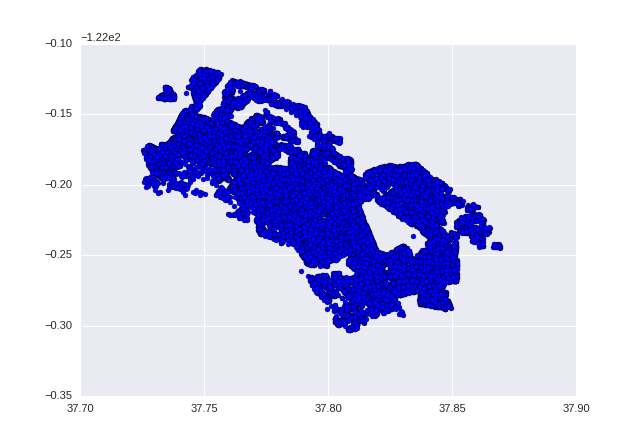

In [241]:
fig = plt.figure()
plt.scatter(df.CenterLat, df.CenterLong)
plt.show()

In [198]:
class City():
    def __init__(self, land_data, zone_data):
        lval = _make_land_values(land_data)
        zones = _make_zone_boundaries(zone_data)
        

    def _make_land_values(df):
        
    def _make_capacities(df):
        
    def _make_zone_boundaries(df):
        
    def add_zone(self, location):
        z = Zone(self, location)


class Zone(City):
    def __init__(self, location):
        row = self.zones.poly[lambda x: x.contains_point(location), :]
        #assert num_rows == 1
        self.type = row.type
        self.value = self.lval
        
        

IndentationError: expected an indented block (<ipython-input-198-00f643834724>, line 9)

In [ ]:
Commercial(10, 20)

In [ ]:
df.LandVal.select(lambda x: x == 0)

<IPython.core.display.Javascript object>


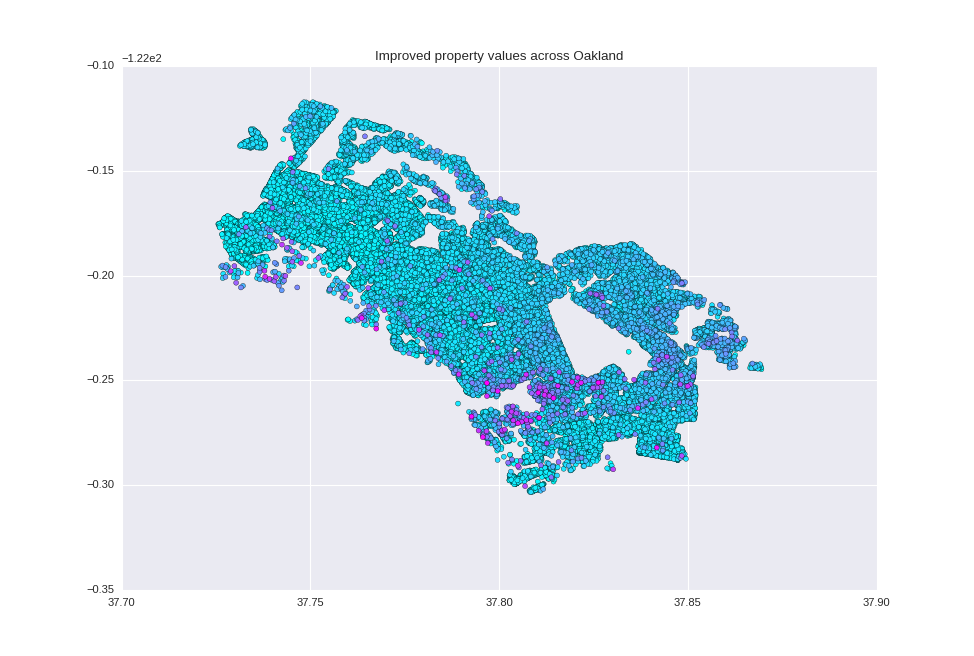

In [251]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
#ax = fig.add_subplot(211, projection='3d')
#ax.scatter3D(df.CenterLat, df.CenterLong, df.ImprVal)
ax = fig.add_subplot(111)
normed = df.ImprVal / max(df.ImprVal)
ax.scatter(df.CenterLat, df.CenterLong, c=normed, cmap='cool')
plt.title("Improved property values across Oakland")
plt.show()

<IPython.core.display.Javascript object>


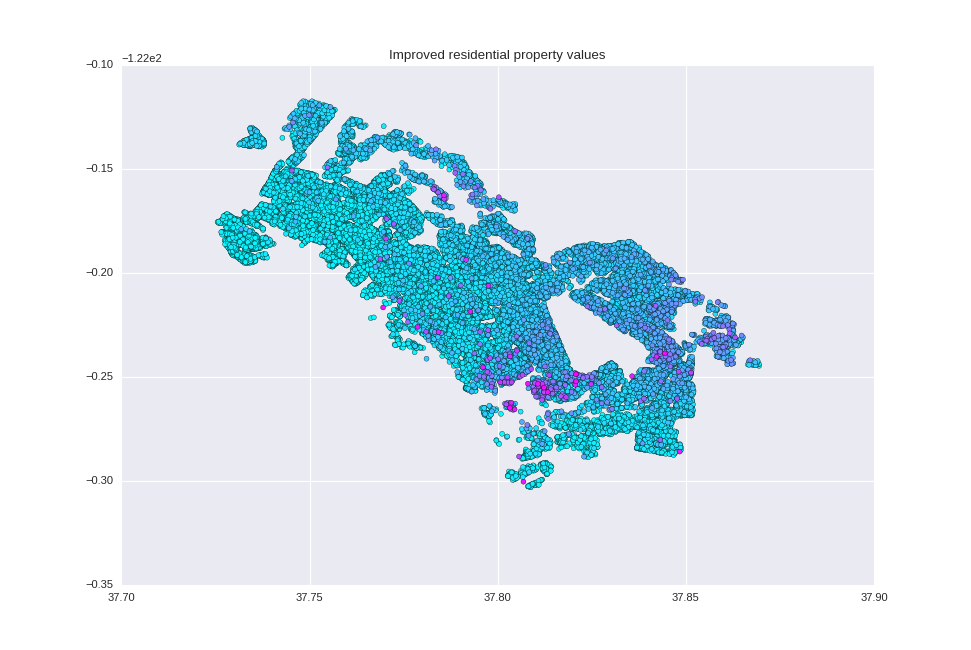

In [255]:
residential = df[df.CommonType.str.contains("residential", regex=True, flags=re.IGNORECASE)]
residential = residential.sort_values("ImprVal")[:-10]
fig = plt.figure()
#ax = fig.add_subplot(211, projection='3d')
#ax.scatter3D(residential.CenterLat, residential.CenterLong, residential.ImprVal)
ax = fig.add_subplot(111)
normed = residential.ImprVal / max(residential.ImprVal)
ax.scatter(residential.CenterLat, residential.CenterLong, c=normed, cmap='cool')
plt.title("Improved residential property values")
plt.show()

<IPython.core.display.Javascript object>


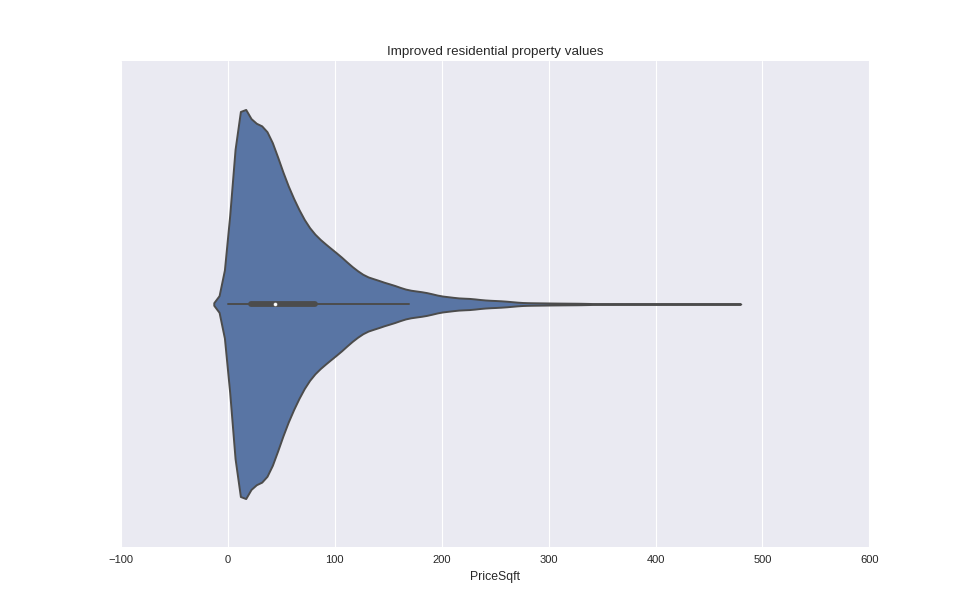

In [268]:
residential = df[df.CommonType.str.contains("residential", regex=True, flags=re.IGNORECASE)]
residential = residential.sort_values("ImprVal")[:-30]
fig = plt.figure()
#ax = fig.add_subplot(211, projection='3d')
#ax.scatter3D(residential.CenterLat, residential.CenterLong, residential.ImprVal)
ax = fig.add_subplot(111)
normed = residential.ImprVal / max(residential.ImprVal)
ax.scatter(residential.CenterLat, residential.CenterLong, c=normed, cmap='cool')
plt.title("Improved residential property values")
plt.show()

<IPython.core.display.Javascript object>


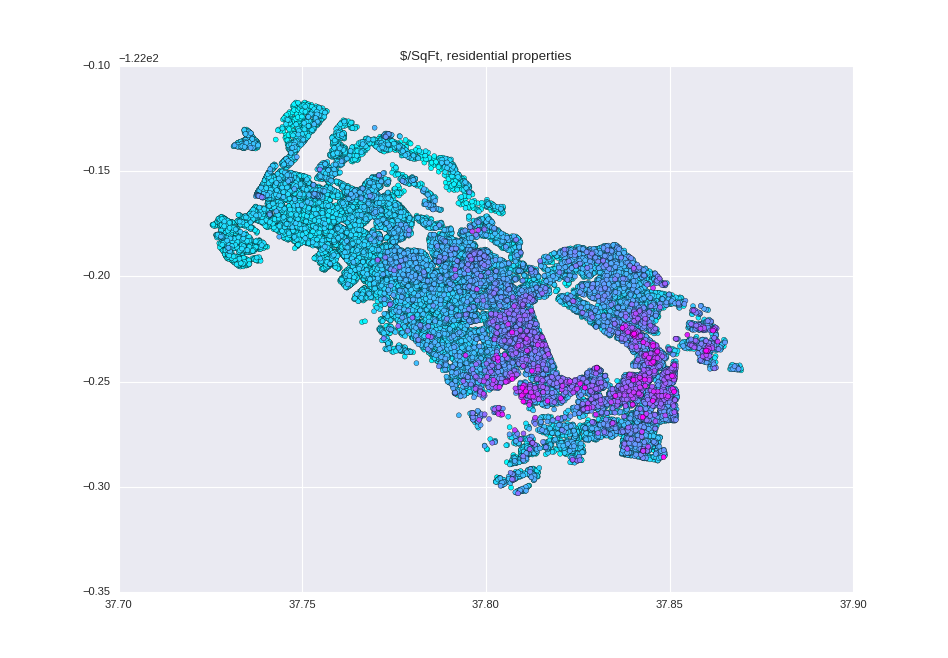

In [265]:
residential = df[df.CommonType.str.contains("residential|home", regex=True, flags=re.IGNORECASE)]
residential = residential.sort_values("PriceSqft")[:-10]
fig = plt.figure()
#ax = fig.add_subplot(211, projection='3d')
#ax.scatter3D(residential.CenterLat, residential.CenterLong, residential.PriceSqft)
ax = fig.add_subplot(111)
normed = residential.PriceSqft / max(residential.PriceSqft)
ax.scatter(residential.CenterLat, residential.CenterLong, c=normed, cmap='cool')
plt.title("$/SqFt, residential properties")
plt.show()

<IPython.core.display.Javascript object>


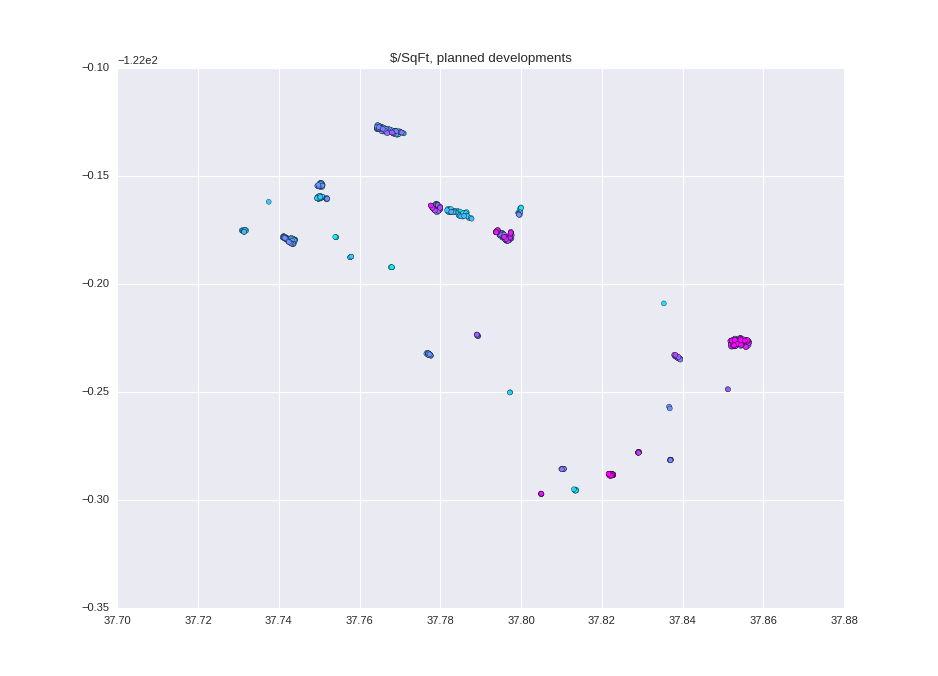

In [264]:
residential = df[df.CommonType.str.contains("planned", regex=True, flags=re.IGNORECASE)]
residential = residential.sort_values("PriceSqft")[:-10]
fig = plt.figure()
#ax = fig.add_subplot(211, projection='3d')
#ax.scatter3D(residential.CenterLat, residential.CenterLong, residential.PriceSqft)
ax = fig.add_subplot(111)
normed = residential.PriceSqft / max(residential.PriceSqft)
ax.scatter(residential.CenterLat, residential.CenterLong, c=normed, cmap='cool')
plt.title("$/SqFt, planned developments")
plt.show()

<IPython.core.display.Javascript object>


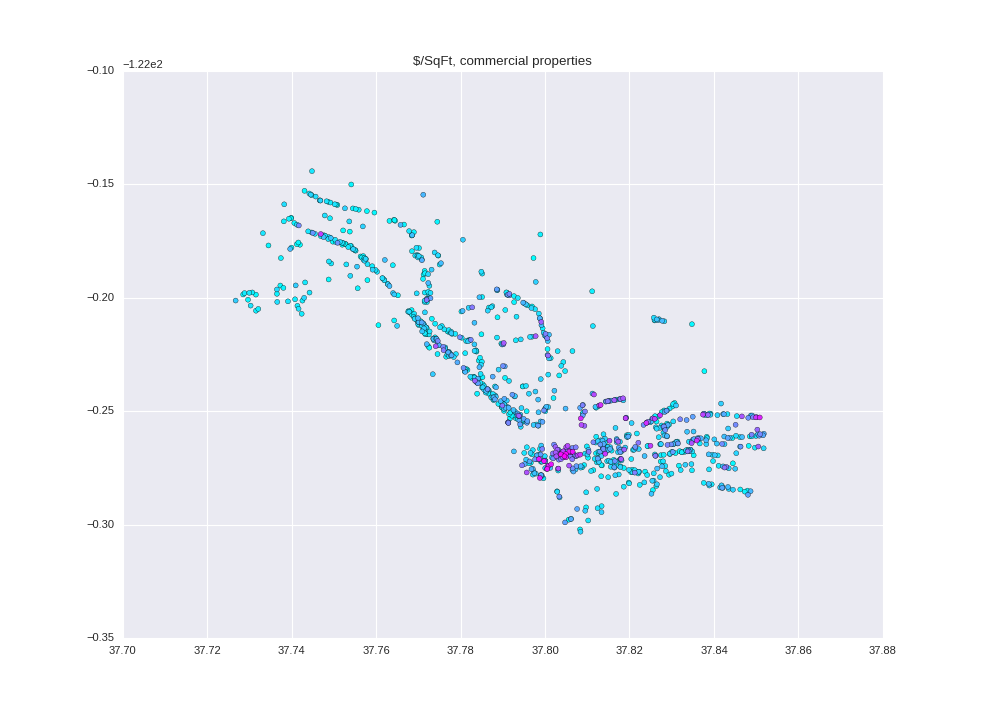

In [266]:
residential = df[df.CommonType.str.contains("office|commercial", regex=True, flags=re.IGNORECASE)]
residential = residential.sort_values("PriceSqft")[:-10]
fig = plt.figure()
#ax = fig.add_subplot(211, projection='3d')
#ax.scatter3D(residential.CenterLat, residential.CenterLong, residential.PriceSqft)
ax = fig.add_subplot(111)
normed = residential.PriceSqft / max(residential.PriceSqft)
ax.scatter(residential.CenterLat, residential.CenterLong, c=normed, cmap='cool')
plt.title("$/SqFt, commercial properties")
plt.show()

In [250]:
from collections import Counter
Counter(df.CommonType)

Counter({'2 units, lesser quality than 2200 or unknown legal': 1147,
         '3 units, lesser quality than 2300 or unknown legal': 414,
         '4 units, lesser quality than 2400 or unknown legal': 211,
         'Automobile dealership': 19,
         'Bank': 21,
         'Car wash': 10,
         'Cemetery': 4,
         'Church': 51,
         'Church Home': 2,
         'Commercial repair garage': 204,
         'Condominium - residential live/work unit': 1,
         'Condominium - single residential living unit': 10,
         'Cooperatives (divided)': 2,
         'Cooperatives (undivided)': 12,
         'Department store': 1,
         'Discount store': 4,
         'Double or duplex type - two units': 2175,
         'Five or more single family res homes': 6,
         'Four living units; e.g. fourplex or triplex w/SFR': 1243,
         'Funeral home': 12,
         'Golf course': 3,
         'Heavy industrial': 18,
         'Historical commercial': 1,
         'Historical residential': 10,


In [161]:
cost_df.columns

Index(['OBJECTID', 'APN', 'DATE_CREAT', 'DATE_UPDAT', 'EDITOR', 'CENTROID_X',
       'CENTROID_Y', 'APNJoin', 'TRACTCE10', 'GEOID10', 'NAME10', 'Lat',
       'Long', 'Population', 'Shape_Area', 'SitusUnit', 'SitusCity',
       'SitusZip', 'SitusZipAd', 'Address', 'Land', 'Imps', 'CLCALand',
       'CLCAImps', 'Fixtures', 'BPP', 'HPP', 'HOEX', 'OTEX', 'TotalNetVa',
       'OwnersName', 'CareofName', 'AttentionN', 'MailingAdd', 'MailingA_1',
       'MailingA_2', 'MailingA_3', 'UseCode', 'CommonType', 'TypeVacant',
       'ResUnits', 'MinUnit', 'MaxUnit', 'AssessorTy', 'SqFt', 'PctUnits',
       'PopUnits', 'ID_1', 'UseCode_1', 'Type2', 'PriceSqft'],
      dtype='object')

<IPython.core.display.Javascript object>


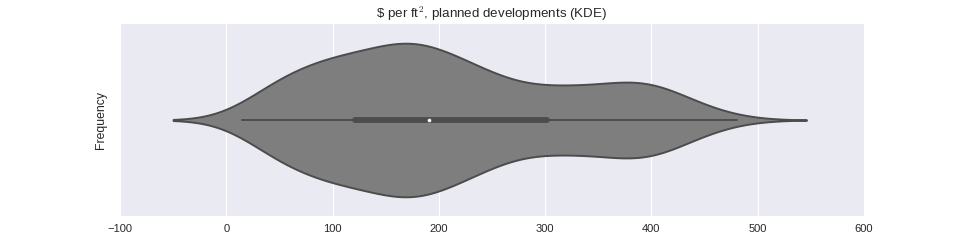

In [292]:
fig = plt.figure(figsize=(12, 3))
#ax = fig.add_subplot(111)

sns.violinplot(data=df[df.CommonType.str.contains("townh", regex=True, flags=re.IGNORECASE)],
               x="PriceSqft",
               saturation=0,
               gridsize=1000)
plt.title('\$ per ft$^2$, planned developments (KDE)')
plt.xlabel("")
plt.ylabel("Frequency")
plt.show()

In [294]:
df[df.CommonType.str.contains("planned", regex=True, flags=re.IGNORECASE) and df.PriceSqft > 400]

,Address_x,UseCode,CommonType,TypeVacant,ResUnits,MinUnit,MaxUnit,AssessorTy,SqFt,PctUnits,...,CenterLat,CenterLong,LandVal,ImprVal,NtTotVal,ResidUnits,TractUnits,SIZE,Address_y,APNprint
42777,408 GRAVATT DR,1100,Single family residential homes used as such,0,1,1,1,Single Family Residential,5399.99191,0.0005,...,37.859979,-122.235264,315000.0,66000.0,381000.0,0,1934,5399.960,GRAVATT DR,48H-7606-44
2889,408 49TH ST,2200,Double or duplex type - two units,0,2,2,2,"Multiple Residential, 2-4 Units and Mobile Homes",399.99386,0.0027,...,37.835821,-122.259108,64662.0,96838.0,161500.0,2,752,399.992,408 49TH ST,13-1146-11
2888,408 49TH ST,2200,Double or duplex type - two units,0,2,2,2,"Multiple Residential, 2-4 Units and Mobile Homes",399.99386,0.0027,...,37.835557,-122.258973,64662.0,96838.0,161500.0,2,752,3702.040,408 49TH ST,13-1146-11
15330,5 CAPTAINS CV,1500,Townhouse - Planned Development,0,0,0,0,Single Family Residential,1658.20701,0.0000,...,37.856074,-122.225958,548872.0,100803.0,642675.0,0,1934,1658.200,5 CAPTAINS CV,48H-7588-13
41760,105 STARVIEW CT,1500,Townhouse - Planned Development,0,0,0,0,Single Family Residential,1808.57622,0.0000,...,37.852153,-122.226231,141529.0,102105.0,236634.0,0,1934,1808.570,105 STARVIEW CT,48H-7590-47
38695,5715 MACCALL ST,1100,Single family residential homes used as such,0,1,1,1,Single Family Residential,1625.05241,0.0021,...,37.842700,-122.266869,58197.0,135794.0,193991.0,2,468,1625.030,5715 MACCALL ST,15-1280-11
2956,4 EALING LN,1500,Townhouse - Planned Development,0,0,0,0,Single Family Residential,615.97814,0.0000,...,37.821752,-122.287857,71250.0,166250.0,237500.0,0,1023,615.973,4 EALING LN,7-621-56
42908,10 AMBLER LN,1500,Townhouse - Planned Development,0,0,0,0,Single Family Residential,616.00528,0.0000,...,37.822629,-122.288138,73200.0,170800.0,244000.0,0,1023,616.005,10 AMBLER LN,7-621-15
15299,25 SCHOONER HL,1500,Townhouse - Planned Development,0,0,0,0,Single Family Residential,1487.29571,0.0000,...,37.855819,-122.226151,82470.0,179791.0,255261.0,0,1934,1487.290,25 SCHOONER HL,48H-7588-76
2940,11 MOSS LN,1500,Townhouse - Planned Development,0,0,0,0,Single Family Residential,728.02424,0.0000,...,37.822135,-122.288343,90000.0,210000.0,293000.0,0,1023,728.014,11 MOSS LN,7-621-70


In [307]:
sum(df[df.CommonType.str.contains("residential|home", regex=True, flags=re.IGNORECASE)].PriceSqft > 400)

18

<IPython.core.display.Javascript object>


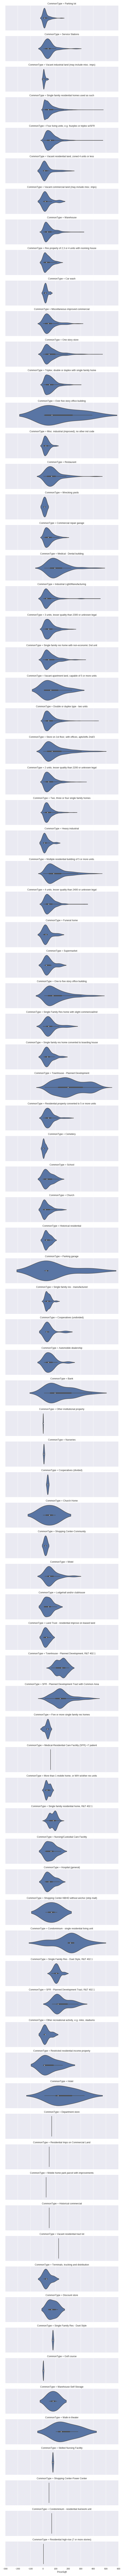

In [267]:
g = sns.FacetGrid(df, row="CommonType", size=2, aspect=4, despine=False, sharex=True, sharey=True)
g.map(sns.violinplot, "PriceSqft")

In [89]:
cost_df

,OBJECTID,APN,DATE_CREAT,DATE_UPDAT,EDITOR,CENTROID_X,CENTROID_Y,APNJoin,TRACTCE10,GEOID10,...,MinUnit,MaxUnit,AssessorTy,SqFt,PctUnits,PopUnits,ID_1,UseCode_1,Type2,PriceSqft
0,1,8-623-12,6/7/2004,6/7/2004,Public Works,6050610.107,2121100.805,8062301200,402900.0,6.001403e+09,...,0,0,Improved Commercial,9.299960e+03,0.0000,0.0000,9515,9400,Commercial,195.909019
1,2,8-623-8,6/7/2004,6/7/2004,Public Works,6050641.567,2120994.350,8062300800,402900.0,6.001403e+09,...,0,0,Improved Commercial,1.000008e+04,0.0000,0.0000,9512,9500,Commercial,819.697460
2,3,8-653-19-3,6/7/2004,6/7/2004,Public Works,6052094.952,2122189.244,8065301903,402900.0,6.001403e+09,...,0,0,Improved Commercial,5.790656e+04,0.0000,0.0000,10180,9500,Commercial,2303.955957
3,4,8-637-20-1,6/7/2004,6/7/2004,Public Works,6051272.762,2121555.892,8063702001,402900.0,6.001403e+09,...,0,0,Improved Commercial,2.476247e+04,0.0000,0.0000,10052,9200,Commercial,145.381280
4,5,8-624-14,6/7/2004,6/7/2004,Public Works,6050971.112,2120965.465,8062401400,402900.0,6.001403e+09,...,0,0,Improved Commercial,6.778169e+03,0.0000,0.0000,9529,9400,Commercial,383.330807
5,6,8-625-17,6/7/2004,6/7/2004,Public Works,6051357.753,2120884.319,8062501700,402900.0,6.001403e+09,...,0,0,Improved Commercial,7.499846e+03,0.0000,0.0000,9570,8300,Commercial,81.750748
6,7,8-653-14-1,6/7/2004,6/7/2004,Public Works,6051704.930,2122305.584,8065301401,402900.0,6.001403e+09,...,0,0,"Exempt, Not Assessed by County, Mobile Homes a...",2.552382e+04,0.0000,0.0000,10178,500,Exempt,0.000000
7,8,8-624-1-1,6/7/2004,1/31/2007,LT,6051067.974,2121099.093,8062400101,402900.0,6.001403e+09,...,0,0,Improved Commercial,2.400545e+04,0.0000,0.0000,9518,9500,Commercial,697.082387
8,9,8-636-15,6/7/2004,6/7/2004,Public Works,6051422.365,2121106.534,8063601500,402900.0,6.001403e+09,...,0,0,Improved Commercial,5.999984e+03,0.0000,0.0000,10038,9400,Commercial,209.279544
9,10,8-637-8-6,6/7/2004,6/7/2004,Public Works,6051261.437,2121389.203,8063700806,402900.0,6.001403e+09,...,0,0,Improved Commercial,3.501944e+04,0.0000,0.0000,10047,9500,Commercial,2729.363430


In [150]:
set(cost_df.AssessorTy)

{'Commercial (See also 8X & 9X Series)',
 'Exempt, Not Assessed by County, Mobile Homes and Tracts',
 'Improved Commercial',
 'Industrial',
 'Institutional',
 'Multiple Residential, 2-4 Units and Mobile Homes',
 'Multiple Residential, 5 or more units',
 'Rural',
 'Single Family Residential'}

<IPython.core.display.Javascript object>


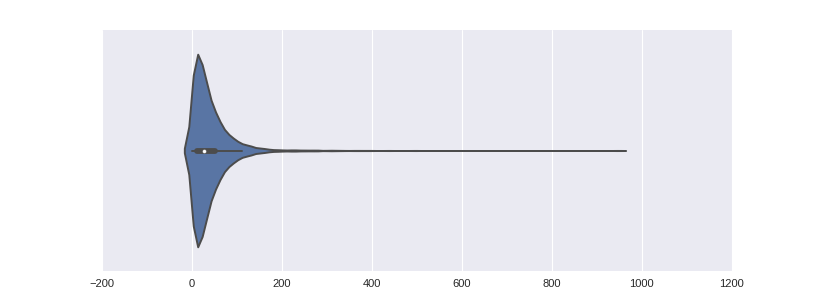

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)

sns.violinplot((filted.ImprVal / filted.SIZE), ax=ax)
plt.show()